# ...The Big G!

# FEniCS workshop Exercise 2

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (16, 8)

In [2]:
from fenics import *
from mshr import *

# Exercise:

Solve the heat equation, given

\begin{equation}
\nabla^2T + f(x, y) =0 \,\,\,\, \text{on} \,\,\,\,\Omega
\end{equation}

You may have noticed that this is the same as the Poisson's equation we solved previously, here we just have a different domain with different boundary conditions. The variational formulation the same as in the previous exercise, but you will have to define a new domain/mesh, source term and boundary conditions.


The variational problem is

\begin{equation}
    \int_{\Omega} (\nabla T \cdot\nabla v)\,\text{d}\Omega = \int_{\Omega} \,f \cdot v\,\text{d}\Omega\,. 
\end{equation}

### Domain

We already have defined a domain and mesh for you

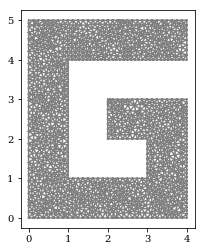

In [3]:
domain_vertices = [Point(0.0, 0.0), Point(4.0, 0.0), Point(4.0, 3.0), Point(2.0, 3.0),
                   Point(2.0, 2.0), Point(3.0, 2.0), Point(3.0, 1.0), Point(1.0, 1.0),
                   Point(1.0, 4.0), Point(4.0, 4.0), Point(4.0, 5.0), Point(0.0, 5.0)]
mesh = generate_mesh(Polygon(domain_vertices), 30)
plot(mesh);

We now need to define the `FunctionSpace()` for this problem. Here again we can use 1$^{st}$ order Lagrange space functions.

In [4]:
V =  FunctionSpace(mesh, 'Lagrange', 1)# 1st order Lagrange Function Space

For convenience, we will also use the same Function Space for our trial function $T$ and the test function $v$.

In [5]:
T = TrialFunction(V)
v = TestFunction(V)

### Boundary Conditions

The temperature is fixed to be 1 along the whole right boundary $T(4, y)=1$. On all the other boundaries the derivative of the temperature vanishes $\partial_{x_i}T(\text{on}\,\,\partial\Omega)=0$ (natural boundary condition).

Thus we need a function `boundary(x)` that return  `True` of the node lies on the right boundary. (Hint: use the built-in `near(x[], x, tol)` function.)

In [6]:
def boundary(x):
    return near(x[0], 4)

Now generate the Dirichlet boundary conditions (Hint: recall the `DirichletBC()` function.)

In [7]:
bc = DirichletBC(V, Constant(1), boundary)

### Source Term

The heat source is given by 

\begin{equation}
f(x, y) = exp(-(x^2 + y^2))
\end{equation}

(Hint: `Expression` take C-style expressions, and knows all the functions from `math.h`)

In [8]:
f = Expression('exp(-x[0]*x[0] - x[1]*x[1])', degree=2)

### Solving

Now we can write the variational problem to solve it in FEniCS.

(Hint: as the variational form is the same as the previous exercise, the definition of $a(T, v)$ and $L(f, v)$ are the same.)

In [9]:
a = inner(grad(T), grad(v))*dx
L = f*v*dx

Don't forget to create a vector to store the solution before solving!

(Hint: store the solution in a `Function()` array.)

In [10]:
T_sol = Function(V)
solve(a == L, T_sol, bc,
     solver_parameters={'linear_solver':'gmres',
                        'preconditioner':'ilu'})

## Post-Processing

(Hint: try the `"contourf"` or `"warp"` mode in the `plot()` function to have different outplut.)

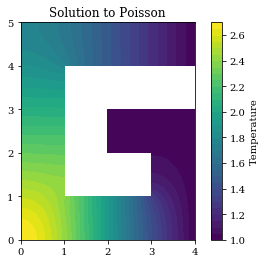

In [11]:
p = plot(T_sol, title="Solution to Poisson", mode="contourf", cmap="viridis");
plt.colorbar(p, label="Temperature");